In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from lyft_analysis.db import presto

{"ts": "2022-02-02T19:29:03.715Z", "uuid": "2c2184c9-bfb2-42d6-878e-c5979f25f4f0", "name": "lyft_configset.configset", "lvlname": "ERROR", "lvlno": 40, "pid": 131, "call_site": "site-packages/lyft_configset/configset.py:77", "revision": "be1326c6dc", "msg": "Neither a configset at /srv/configset/envoyclient/current/ or runtime directory at /srv/runtime_data/current/envoyclient were found. It's likely that this is misconfigured."}


In [13]:
gh5_hours = """
select  orders
       ,1.00*olo_orders/orders as olo_order_proportion
       ,orders_arrived_at_pickup
       ,round(order_to_arrive_rt,10) as order_to_arrive_rt
       ,total_min
       ,p3_min
       ,p2_min
       ,p1_min
       ,round(p3_utilization,10) as p3_utilization
    from hive.deliveryds.fact_delivery_geohash_hour_marketplace_metrics
    where order_to_arrive_rt is not null
      and total_min is not null
      and p3_utilization is not null
      and ds > '2021-11-01'
"""

In [6]:
df = presto.query(gh5_hours)

In [14]:
df.describe()

,orders,olo_order_proportion,orders_arrived_at_pickup,order_to_arrive_rt,total_min,p3_min,p2_min,p1_min,p3_utilization
count,162361.000000,162361.000000,162361.000000,162361.000000,162361.000000,162361.000000,162361.000000,162361.000000,162361.000000
mean,1.556026,0.439759,1.444750,0.941501,237.287255,115.980476,56.482357,64.824422,0.463543
std,3.804855,0.495092,3.375906,0.219116,334.768852,185.094187,66.617075,138.053193,0.150436
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,73.000000,30.000000,21.000000,12.000000,0.373391
50%,1.000000,0.000000,1.000000,1.000000,147.000000,68.000000,40.000000,30.000000,0.476510
75%,1.000000,1.000000,1.000000,1.000000,283.000000,142.000000,70.000000,66.000000,0.566265
max,389.000000,1.000000,269.000000,1.000000,10415.000000,7580.000000,2293.000000,3413.000000,1.000000


In [15]:
df.dtypes

orders                        int64
olo_order_proportion        float64
orders_arrived_at_pickup      int64
order_to_arrive_rt          float64
total_min                     int64
p3_min                        int64
p2_min                        int64
p1_min                        int64
p3_utilization              float64
dtype: object

In [16]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df.astype(np.float64)
clean_dataset(df)


,orders,olo_order_proportion,orders_arrived_at_pickup,order_to_arrive_rt,total_min,p3_min,p2_min,p1_min,p3_utilization
0,1.0,1.0,1.0,1.0,183.0,73.0,37.0,73.0,0.398907
1,1.0,0.0,1.0,1.0,39.0,11.0,24.0,4.0,0.282051
2,2.0,0.0,2.0,1.0,172.0,72.0,72.0,28.0,0.418605
3,1.0,1.0,1.0,1.0,154.0,67.0,26.0,61.0,0.435065
4,1.0,0.0,1.0,1.0,107.0,69.0,37.0,1.0,0.644860
...,...,...,...,...,...,...,...,...,...
162356,1.0,0.0,1.0,1.0,428.0,314.0,99.0,15.0,0.733645
162357,1.0,1.0,1.0,1.0,35.0,16.0,17.0,2.0,0.457143
162358,1.0,0.0,1.0,1.0,101.0,51.0,45.0,5.0,0.504950
162359,1.0,1.0,1.0,1.0,1022.0,545.0,147.0,330.0,0.533268


In [10]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

,orders,olo_order_proportion,orders_arrived_at_pickup,order_to_arrive_rt,total_min,p3_min,p2_min,p1_min,p3_utilization


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162361 entries, 0 to 162360
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   orders                    162361 non-null  int64  
 1   olo_order_proportion      162361 non-null  float64
 2   orders_arrived_at_pickup  162361 non-null  int64  
 3   order_to_arrive_rt        162361 non-null  float64
 4   total_min                 162361 non-null  int64  
 5   p3_min                    162361 non-null  int64  
 6   p2_min                    162361 non-null  int64  
 7   p1_min                    162361 non-null  int64  
 8   p3_utilization            162361 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 12.4 MB


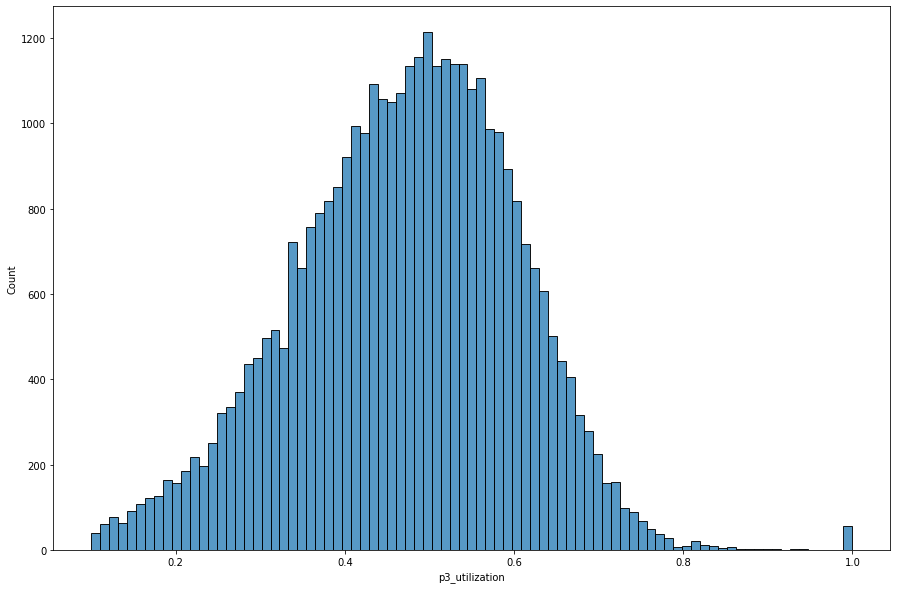

In [59]:
#distribution of independent variable p3_utilization
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(df['p3_utilization'])
plt.show() 

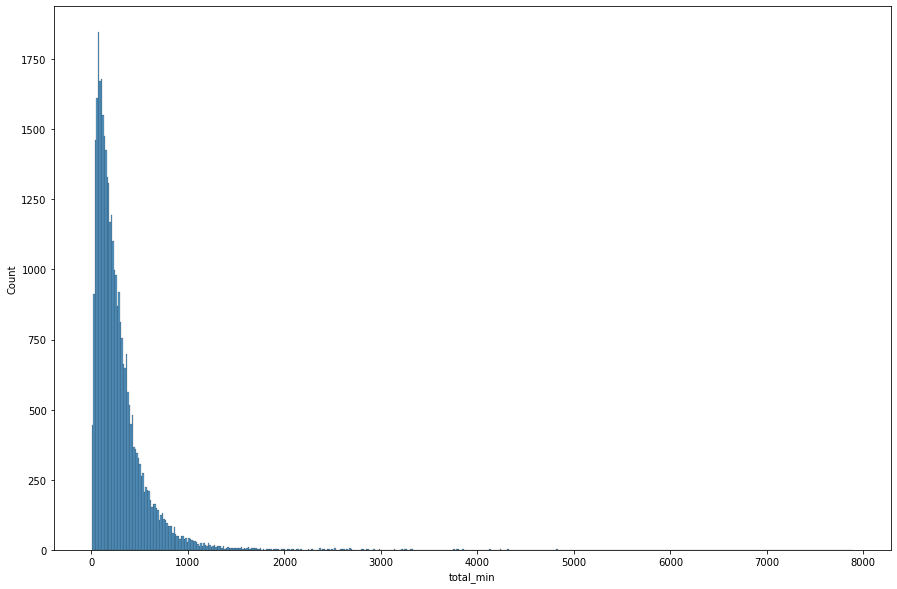

In [60]:
#distribution of independent variable total_min
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(df['total_min'])
plt.show() 

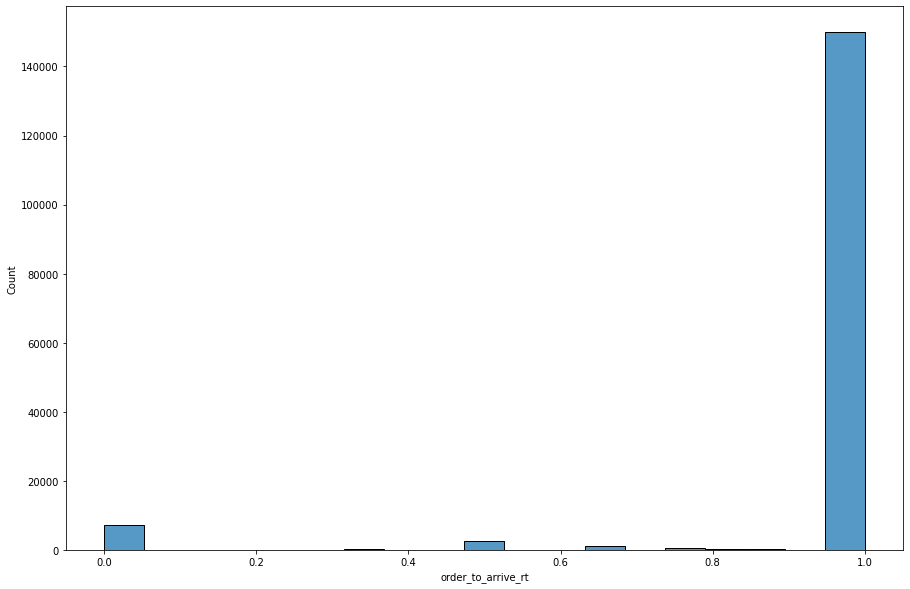

In [19]:
#distribution of dependent variable order_to_accept_rt
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.histplot(df['order_to_arrive_rt'])
plt.show() 

In [20]:
#understand rough relationships

df['bucketed_p3_utilization'] = round(df['p3_utilization']/5,2)*5
gdf = df.groupby(by='bucketed_p3_utilization',as_index=False).agg({'orders':np.sum,'orders_arrived_at_pickup':np.sum})
gdf['arrive_rt'] = 1.00 * gdf['orders_arrived_at_pickup']/gdf['orders']

Text(0.5, 1.0, 'arrive rt by p3 utilization')

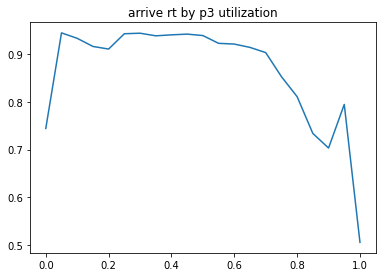

In [21]:
fig1 = plt.figure()
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
axes1.plot('bucketed_p3_utilization','arrive_rt',data=gdf)
axes1.set_title('arrive rt by p3 utilization')


In [23]:
df = df[(df['p3_utilization']>0.1) & (df['total_min'] > 1) & (df['orders']>1)]

In [24]:
df.describe()

,orders,olo_order_proportion,orders_arrived_at_pickup,order_to_arrive_rt,total_min,p3_min,p2_min,p1_min,p3_utilization,bucketed_p3_utilization
count,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.000000,35940.00000,35940.000000,35940.000000,35940.000000
mean,3.495632,0.278358,3.185392,0.923914,286.501419,141.480467,71.39207,73.628881,0.471436,0.471483
std,7.780973,0.441938,6.884966,0.197855,338.950064,191.205081,67.43843,126.689666,0.129407,0.130202
min,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,0.100418,0.100000
25%,2.000000,0.000000,2.000000,1.000000,104.000000,43.000000,33.00000,16.000000,0.385965,0.400000
50%,2.000000,0.000000,2.000000,1.000000,203.000000,97.000000,56.00000,38.000000,0.479452,0.500000
75%,3.000000,1.000000,3.000000,1.000000,359.000000,183.000000,91.00000,82.000000,0.562500,0.550000
max,389.000000,1.000000,269.000000,1.000000,7888.000000,5092.000000,1376.00000,2886.000000,1.000000,1.000000


In [61]:
y_log = np.log(df['order_to_arrive_rt'].values.reshape(-1,1) + 1)
x = df['p3_utilization'].values.reshape(-1,1)

In [62]:
X_train_exp, X_test_exp, Y_train_exp, Y_test_exp = train_test_split(x, y_log, test_size=0.2, random_state= 42)


In [63]:
exp_model= LinearRegression()
exp_model.fit(X_train_exp, Y_train_exp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print(" Exponent Model Intercept value is ", exp_model.intercept_)
print(" Exponent model Coefficient value is ", exp_model.coef_)

 Exponent Model Intercept value is  [0.69190386]
 Exponent model Coefficient value is  [[-0.09311833]]


In [65]:
exp_model_pred= exp_model.predict(X_test_exp)
exp_model_pred

array([[0.62353026],
       [0.64235246],
       [0.63569219],
       ...,
       [0.67091187],
       [0.65603041],
       [0.63888759]])

In [66]:
pmsh_exp = pd.DataFrame({'Actual':Y_test_exp.flatten(), 'Predict': exp_model_pred.flatten()})
pmsh_exp

,Actual,Predict
0,0.693147,0.623530
1,0.693147,0.642352
2,0.693147,0.635692
3,0.693147,0.643934
4,0.693147,0.663731
...,...,...
7183,0.693147,0.654247
7184,0.606136,0.645464
7185,0.619039,0.670912
7186,0.693147,0.656030


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_exp, exp_model_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_exp, exp_model_pred) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_exp, exp_model_pred)))
print("R^2 Score :          ", metrics.r2_score(Y_test_exp, exp_model_pred))


Mean Absolute Error: 0.07737207545598462
Mean Squared Error: 0.01637706625946128
Root Mean Squared Error: 0.12797291220981602
R^2 Score :           0.00731861334289563


In [68]:
X_c = df[['p3_utilization','total_min','olo_order_proportion']]
Y_c = np.log(df['order_to_arrive_rt'] + 1)

In [69]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2, random_state= 42)


In [70]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_c, Y_train_c)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print(" Intercept value of Polynomial Model is " ,polynomial_model.intercept_)

coeff_df = pd.DataFrame(polynomial_model.coef_, X_c.columns, columns=['value'])
print(coeff_df)

 Intercept value of Polynomial Model is  0.6700769232981939
                         value
p3_utilization       -0.074770
total_min             0.000014
olo_order_proportion  0.032617


In [72]:
coeff_df.index.names=['parameter']
coeff_df.reset_index(inplace=True,col_fill='parameter')

intercept_df = pd.DataFrame({'value':polynomial_model.intercept_},index=[0])
intercept_df.index.names=['parameter']
intercept_df.reset_index(inplace=True,col_fill='parameter')
intercept_df.replace(to_replace=[0],value='intercept',inplace=True)

In [73]:
df_outcome = pd.concat([coeff_df, intercept_df],axis=0)

In [74]:
df_outcome

,parameter,value
0,p3_utilization,-0.074770
1,total_min,0.000014
2,olo_order_proportion,0.032617
0,intercept,0.670077


In [75]:
from datetime import datetime, date, timezone

In [76]:
y_pred_poly = polynomial_model.predict(X_test_c)

In [77]:
df_outcome['train_ds'] = pd.to_datetime('today').date()
df_outcome['train_ds'] = df_outcome['train_ds'].astype(str)

In [78]:
cols = ['parameter','value','train_ds']

In [84]:
df_outcome

,parameter,value,train_ds
0,p3_utilization,-0.074770,2022-02-02
1,total_min,0.000014,2022-02-02
2,olo_order_proportion,0.032617,2022-02-02
0,intercept,0.670077,2022-02-02


In [85]:
df_33 = pd.DataFrame({'Actual':Y_test_c, 'Predicted': y_pred_poly})
df_33.head()

,Actual,Predicted
64379,0.693147,0.619266
71330,0.693147,0.635853
17784,0.693147,0.662249
142044,0.693147,0.632975
76697,0.693147,0.693544


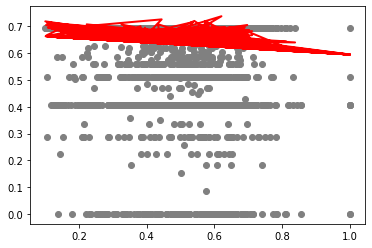

In [86]:
x_t_c =np.array(X_test_c)
plt.scatter(x_t_c[:,0], Y_test_c,  color='gray')
plt.plot(x_t_c[:,0], y_pred_poly, color='red', linewidth=2)
plt.show()

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_c, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_c, y_pred_poly) ) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred_poly)))
print("R^2 Score :          ", metrics.r2_score(Y_test_c, y_pred_poly))

Mean Absolute Error: 0.07587838143969144
Mean Squared Error: 0.01605917607864021
Root Mean Squared Error: 0.12672480451214044
R^2 Score :           0.02658724549609537


In [90]:
from lyft_analysis import pd as lyft_pd
from lyft_analysis.db import hive
from sklearn.externals import joblib
import os
import sys

def write_results_to_hive(pred_df):
    """Write results to hive """
    os.environ["QUBOLE_UNLOAD_USER"] = "yibeil"
    output = lyft_pd.DataFrame(df_outcome)
    output.to_hive_table_partitioned(
        table_name='delivery_arrival_log_lin_model_outputs',
        partition_col=['train_ds'],
        if_exists='append',
        if_partition_exists='replace',
    )


In [91]:
write_results_to_hive(df_outcome[cols])

{"ts": "2022-02-02T21:34:25.543Z", "uuid": "34292a8d-15a9-4563-bee0-101ad6df3519", "name": "lyft_mozart.mozart", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call_site": "site-packages/lyft_mozart/mozart.py:664", "revision": "be1326c6dc", "kv": {"mozart_id": 137177976, "backend": "sonata-backfill", "native_command_id": "pending", "job_url": "https://sql.lyft.net/databases/mozart/queries/137177976", "query": "SHOW CREATE TABLE yibeil.delivery_arrival_log_lin_model_outputs"}, "msg": "Created Mozart command"}
{"ts": "2022-02-02T21:34:25.544Z", "uuid": "130b2367-e94c-4a31-b593-99f075ba3e34", "name": "lyft_mozart.mozart", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call_site": "site-packages/lyft_mozart/mozart.py:799", "revision": "be1326c6dc", "kv": {"command_id": 137177976}, "msg": "Attempting to get status for Mozart Command"}
{"ts": "2022-02-02T21:34:25.551Z", "uuid": "75d14792-15d9-40db-8368-20bc613c7982", "name": "lyft_mozart.mozart", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call

adding partition train_ds='2022-02-02'


{"ts": "2022-02-02T21:34:56.413Z", "uuid": "3a974fda-6298-4691-ab85-99691e11fffb", "name": "lyft_mozart.mozart", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call_site": "site-packages/lyft_mozart/mozart.py:842", "revision": "be1326c6dc", "kv": {"command_id": 137178042, "status": "done"}, "msg": "Mozart command completed"}
{"ts": "2022-02-02T21:34:56.414Z", "uuid": "22adf6e7-128e-4062-8f9f-81b40518d70e", "name": "lyft_mozart.mozart", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call_site": "site-packages/lyft_mozart/mozart.py:881", "revision": "be1326c6dc", "kv": {"backend": "sonata-backfill", "mozart_id": 137178042, "command_id": 137178042}, "msg": "Mozart command completed successfully!"}
{"ts": "2022-02-02T21:34:56.415Z", "uuid": "172c4e29-37d6-4a3a-9116-0e06b2942fbd", "name": "lyft_analysis.db.hive.DatabaseTool", "lvlname": "INFO", "lvlno": 20, "pid": 131, "call_site": "site-packages/lyft_analysis/db/_mozart_base.py:127", "revision": "be1326c6dc", "msg": "completed query id=1371780